### Choropleth map

World Countries (世界各国): world_countries.json
(based on world-countries.json on the following web page)  
https://github.com/python-visualization/folium/blob/main/examples/data/world-countries.json

Sample data: 
Population of world countries in 2019 (世界各国の人口 2019):  
(based on the data from the following web page)    
https://data.worldbank.org/indicator/SP.POP.TOTL  

#### Import libraries  

In [7]:
import pandas as pd
import folium

#### Parameters  

In [8]:
csv_in = 'world_country_population2019.csv'
html_out = 'world_country_population2019.html'
geo = 'world_countries.json'

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

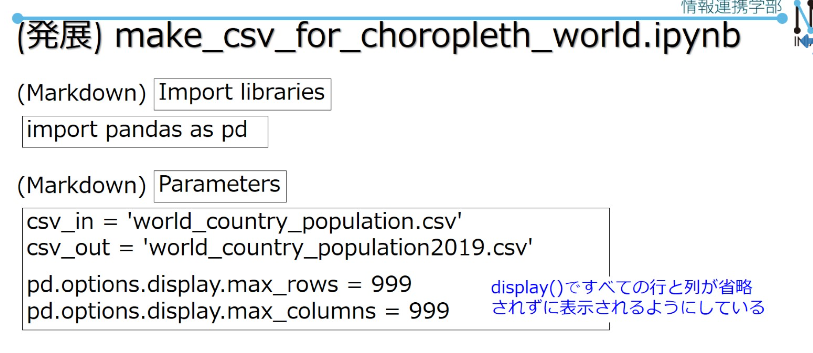

#### Read CSV file  

In [9]:
df_popM = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df_popM.shape)
print(df_popM.info())
display(df_popM.head())

(247, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  247 non-null    object 
 1   Country Code  247 non-null    object 
 2   2019(M)       247 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.9+ KB
None


,Country Name,Country Code,2019(M)
0,Aruba,ABW,0.106314
1,Afghanistan,AFG,38.041754
2,Angola,AGO,31.825295
3,Albania,ALB,2.854191
4,Andorra,AND,0.077142


#### Make choropleth map

In [10]:
m = folium.Map(location=[48,-10], zoom_start=1)
display(m)

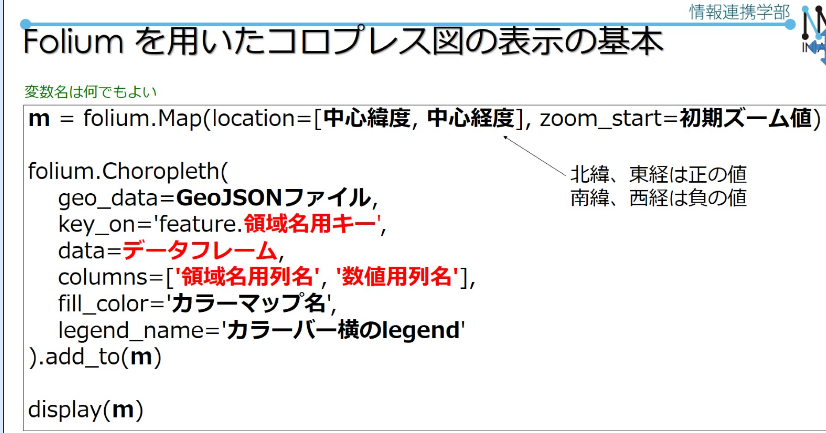

In [11]:
folium.Choropleth(
    geo_data=geo,
    key_on='feature.id',
    data=df_popM,
    columns=['Country Code', '2019(M)'],
    fill_color='BuGn',
    legend_name='Population (M) 2019'
).add_to(m)

display(m)

#### Save to html file  

In [12]:
m.save(outfile=html_out)